In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [20]:
agriculture = 'C:\\Users\jainrah\personal\learning\dataset\\agriculture\\agriculture'
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img, volatile=True), size)).data

# a simple custom collate function, just to show the idea
def my_collate(batch):
    data = torch.stack([item[0] for item in batch])
    # data = torch.stack([resize2d(item[0], 224) for item in batch])
    target = [item[1] for item in batch]
    # AdaptiveAvgPooling
    target = torch.LongTensor(target)
    return [data, target]

def load_dataset(_transform=torchvision.transforms.ToTensor()):
    # data_path = 'data/train/'
    data_path = agriculture
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=_transform,
        # transform=train_transforms
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=16,
        num_workers=0,
        collate_fn=my_collate,  # use custom collate function here
        shuffle=True
    )
    return train_loader

def show_transformed_images(_transform=torchvision.transforms.ToTensor()):
    trainloader = load_dataset(_transform)
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images # Let us show some of the training images, for fun.
    imshow(torchvision.utils.make_grid(images[0:2]))

# Original Images

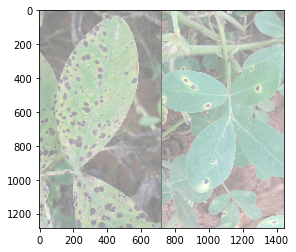

In [22]:
# this is original images
show_transformed_images()

## Center Crop Images

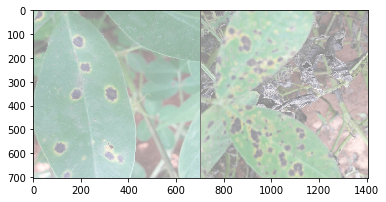

In [32]:
# this is Center Crop images
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700),transforms.ToTensor()]))

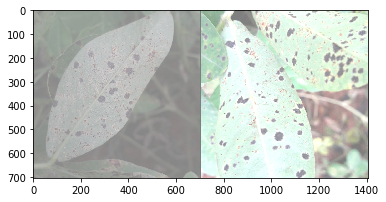

In [50]:
# this is ColorJitter images
# random application of brightness, contrast etc
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700), 
     transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0, hue=0),
     transforms.ToTensor()]))

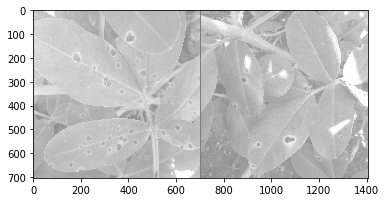

In [53]:
# Converting Images to gray scale
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700), 
     transforms.Grayscale(num_output_channels=1),
     transforms.ToTensor()]))

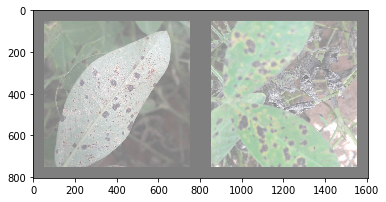

In [54]:
# Add padding to Images
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700), 
     transforms.Pad(50),
     transforms.ToTensor()]))

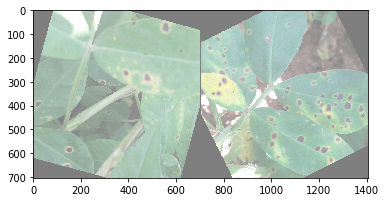

In [55]:
# Add random affine transformation to Images
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700), 
     transforms.RandomAffine(30, translate=None, scale=None, shear=None, resample=False, fillcolor=0),
     transforms.ToTensor()]))

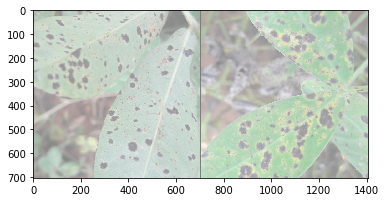

In [57]:
# Add random horizontal flips
show_transformed_images(_transform=torchvision.transforms.Compose(
    [transforms.CenterCrop(700), 
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor()]))